In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
def solution_polar_coords(X, Z, theta):
    """
    Python implementation of velocity and pressure solutions in Polar coordinates
    :param X: X Cartesian coordinates (generated with np.meshgrid)
    :param Z: Z Cartesian coordinates (generated with np.meshgrid)
    :param theta: dip of the lithosphere base
    :return: velocity and pressure fields. The return shape equals the shape of X and Z.
    """
    R = np.sqrt(X ** 2 + Z ** 2)
    T = np.arctan2(X, -Z)
    C1 = 2. * np.sin(theta) ** 2 / (np.pi - 2. * theta - np.sin(2. * theta))
    C4 = -2. / (np.pi - 2. * theta - np.sin(2. * theta))
    vr = (C1 + C4) * np.cos(T) - C4 * T * np.sin(T)
    vt = -(C1 * np.sin(T) + C4 * T * np.cos(T))
    U = vr * np.sin(T) + vt * np.cos(T)
    W = -vr * np.cos(T) + vt * np.sin(T)
    P = 2. * C4 / R * np.cos(T)
    P = np.asarray([[p if np.abs(t) <= 0.5 * np.pi - theta else np.NaN for t, p in zip(rT, rP)] 
                    for rT, rP in zip(T, P)])
    return U, W, P

In [3]:
def solution_cartesian_coords(X, Z, theta):
    """
    Python implementation of velocity and pressure solutions in Cartesian coordinates
    :param X: X Cartesian coordinates (generated with np.meshgrid)
    :param Z: Z Cartesian coordinates (generated with np.meshgrid)
    :param theta: dip of the lithosphere base
    :return: velocity and pressure fields. The return shape equals the shape of X and Z.
    """
    C1 = 2. * (np.sin(theta)) ** 2 / (np.pi - 2. * theta - np.sin(2. * theta))
    C4 = -2. / (np.pi - 2. * theta - np.sin(2. * theta))
    T = -np.arctan(X/Z)
    Q = (X ** 2 + Z ** 2)

    U = C4 * (np.arctan(X/Z) - X * Z / Q)
    W = C4 * (np.sin(theta) ** 2 - Z ** 2. / Q)
    P = -2. * C4 * Z / Q

    P = np.asarray([[p if np.abs(t) <= 0.5 * np.pi - theta else np.NaN for t, p in zip(rT, rP)]
                    for rT, rP in zip(T, P)])

    return U, W, P

In [4]:
theta_p = 25.*np.pi/180.  # it can vary from 0 to 60 deg.

In [5]:
x = np.linspace(-1.0, 1.0, 500)
z = np.linspace(-1.0, 0.0, 500)

[X, Z] = np.meshgrid(x, z)

# switch between polar and cartesian coordinate system:
# [U, W, P] = solution_polar_coords(X, Z, theta_p)  # refer to equations (6) and (7) 
[U, W, P] = solution_cartesian_coords(X, Z, theta_p);  # reter to equations (8) and (10)

/var/folders/4z/_rhsq3x965gc56klbm0nmv040000gn/T/ipykernel_24306/1884404123.py:11: RuntimeWarning: divide by zero encountered in true_divide
  T = -np.arctan(X/Z)
/var/folders/4z/_rhsq3x965gc56klbm0nmv040000gn/T/ipykernel_24306/1884404123.py:14: RuntimeWarning: divide by zero encountered in true_divide
  U = C4 * (np.arctan(X/Z) - X * Z / Q)


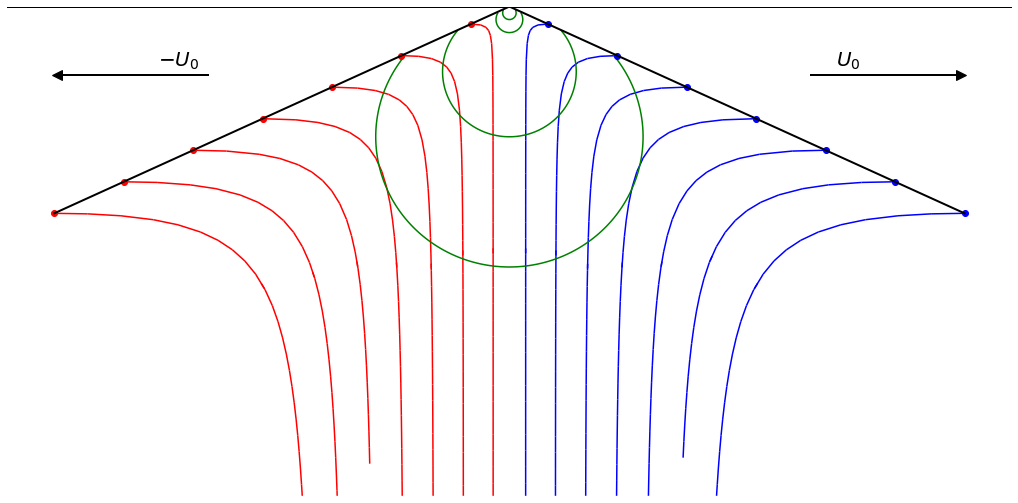

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(18., 9.0)

nlines = 7
sm = 0.2 * np.minimum(np.sin(theta_p), np.cos(theta_p))
# velocity streamlines in the positive X axis
seed = np.zeros([nlines, 2])
seed[:, 0] = np.linspace(sm*np.cos(theta_p), np.cos(theta_p), nlines)
seed[:, 1] = np.linspace(-sm*np.sin(theta_p), -np.sin(theta_p), nlines)
ax.plot(seed[:, 0], seed[:, 1], 'bo')
ax.streamplot(X, Z, U, W, arrowstyle='-', color='b', start_points=seed, integration_direction='backward')

# velocity streamlines in the negative X axis
seed[:, 0] = np.linspace(-np.cos(theta_p), -sm*np.cos(theta_p), nlines)
seed[:, 1] = np.linspace(-np.sin(theta_p), -sm*np.sin(theta_p), nlines)
ax.plot(seed[:, 0], seed[:, 1], 'ro')
ax.streamplot(X, Z, U, W, arrowstyle='-', color='r', start_points=seed, integration_direction='backward')

# pressure contours
ax.contour(X, Z, P, levels=[-100., -50., -10., -5.], colors='g', linestyles='-')

# plot X axis
ax.plot([-1., 1.], [0., 0.], '-k', linewidth=2)
# plot the bottom of the lithosphere plates
ax.plot([-np.cos(theta_p), 0., np.cos(theta_p)], [-np.sin(theta_p), 0., -np.sin(theta_p)], '-k', linewidth=2)
# U_0 line
ax.plot([0.6, 0.9], [-np.sin(theta_p)/3., -np.sin(theta_p)/3.], '-k', linewidth=2)
ax.plot(0.9, -np.sin(theta_p)/3., '>k', markersize=10, markerfacecolor='k')
ax.text(0.65, -np.sin(theta_p)/3.5, r'$U_0$', fontsize=20)
# -U_0 line
ax.plot([-0.6, -0.9], [-np.sin(theta_p)/3., -np.sin(theta_p)/3.], '-k', linewidth=2)
ax.plot(-0.9, -np.sin(theta_p)/3., '<k', markersize=10, markerfacecolor='k')
ax.text(-0.7, -np.sin(theta_p)/3.5, r'$-U_0$', fontsize=20)

ax.set_axis_off()

plt.show()